In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

### nop1 data

In [2]:
df = pd.read_csv('../../../data/Brood_size_nop1.csv')
df['Fraction gravid'] = (1 - df['Lethality']) * (1 - df['Sterility'])
df['Fraction sterile'] = (1 - df['Lethality']) * df['Sterility']
df['Fraction dead'] = df['Lethality']

# Order by fraction dead
df = df.sort_values(by='Fraction dead')

### WT data

In [3]:
df_wt = pd.read_csv('../../../data/Brood_size_wt.csv')
df_wt['Fraction gravid'] = (1 - df_wt['Lethality 5/11/21']) * (1 - df_wt['Sterility 6/11/21'])
df_wt['Fraction sterile'] = (1 - df_wt['Lethality 5/11/21']) * df_wt['Sterility 6/11/21']
df_wt['Fraction dead'] = df_wt['Lethality 5/11/21']

# Order by fraction dead
df_wt = df_wt.sort_values(by='Fraction dead')

### Figures

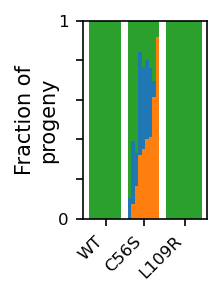

In [4]:
genotype_order = ['Wild type', 'C56S', 'L109R']
i_min = []
i_max = []

fig, ax = plt.subplots()
i = 0
for g in genotype_order:
    _df = df_wt[df_wt.Genotype == g]
    i_min.append(i)
    for _, row in _df.iterrows():
        ax.bar(x=i, bottom=0, height=row['Fraction dead'], color='tab:orange', width=1)
        ax.bar(x=i, bottom=row['Fraction dead'], height=row['Fraction sterile'], color='tab:blue', width=1)
        ax.bar(x=i, bottom=row['Fraction dead']+ row['Fraction sterile'], height=row['Fraction gravid'], 
               color='tab:green', width=1)
        i += 1
    i_max.append(i-0.5)
    i += 2
    
tick_pos = (np.array(i_min) + np.array(i_max)) / 2
ax.set_xticks(tick_pos)
labels = ['WT', 'C56S', 'L109R']
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_ylim(0, 1)
ax.set_ylabel('Fraction of\nprogeny', fontsize=10, labelpad=0)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '', '', '', '', '1'])
# ax.set_xlabel('')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(1.5, 2)
fig.subplots_adjust(left=0.35, bottom=0.22)
fig.savefig('Figs/brood_size_ctrl.png', dpi=600, transparent=True)

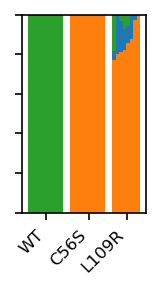

In [5]:
genotype_order = ['WT', 'C56S', 'L109R']
i_min = []
i_max = []

fig, ax = plt.subplots()
i = 0
for g in genotype_order:
    _df = df[df.Genotype == g]
    i_min.append(i)
    for _, row in _df.iterrows():
        ax.bar(x=i, bottom=0, height=row['Fraction dead'], color='tab:orange', width=1)
        ax.bar(x=i, bottom=row['Fraction dead'], height=row['Fraction sterile'], color='tab:blue', width=1)
        ax.bar(x=i, bottom=row['Fraction dead']+ row['Fraction sterile'], height=row['Fraction gravid'], 
               color='tab:green', width=1)
        i += 1
    i_max.append(i-0.5)
    i += 2
    
tick_pos = (np.array(i_min) + np.array(i_max)) / 2
ax.set_xticks(tick_pos)
labels = ['WT', 'C56S', 'L109R']
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['', '', '', '', '', ''])
ax.set_xlabel('')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(1.5, 2)
fig.subplots_adjust(left=0.35, bottom=0.22)
fig.savefig('Figs/brood_size_nop1.png', dpi=600, transparent=True)

### GCN4 (control)

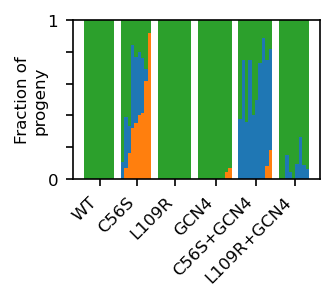

In [6]:
genotype_order = ['Wild type', 'C56S', 'L109R', 'GCN4', 'C56S, GCN4', 'L109R, GCN4']
i_min = []
i_max = []

fig, ax = plt.subplots()
i = 0
for g in genotype_order:
    _df = df_wt[df_wt.Genotype == g]
    i_min.append(i)
    for _, row in _df.iterrows():
        ax.bar(x=i, bottom=0, height=row['Fraction dead'], color='tab:orange', width=1)
        ax.bar(x=i, bottom=row['Fraction dead'], height=row['Fraction sterile'], color='tab:blue', width=1)
        ax.bar(x=i, bottom=row['Fraction dead']+ row['Fraction sterile'], height=row['Fraction gravid'], 
               color='tab:green', width=1)
        i += 1
    i_max.append(i-0.5)
    i += 2
    
tick_pos = (np.array(i_min) + np.array(i_max)) / 2
ax.set_xticks(tick_pos)
labels = ['WT', 'C56S', 'L109R', 'GCN4', 'C56S+GCN4', 'L109R+GCN4']
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_ylim(0, 1)
ax.set_ylabel('Fraction of\nprogeny', fontsize=8, labelpad=0)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['0', '', '', '', '', '1'])
# ax.set_xlabel('')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(3, 2)
fig.subplots_adjust(left=0.35, bottom=0.35)
fig.savefig('Figs/brood_size_gcn4_ctrl.png', dpi=600, transparent=True)

### GCN4 (nop-1)

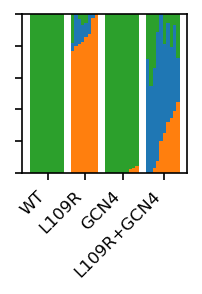

In [7]:
genotype_order = ['WT', 'L109R', 'GCN4', 'L109R, GCN4']
i_min = []
i_max = []

fig, ax = plt.subplots()
i = 0
for g in genotype_order:
    _df = df[df.Genotype == g]
    i_min.append(i)
    for _, row in _df.iterrows():
        ax.bar(x=i, bottom=0, height=row['Fraction dead'], color='tab:orange', width=1)
        ax.bar(x=i, bottom=row['Fraction dead'], height=row['Fraction sterile'], color='tab:blue', width=1)
        ax.bar(x=i, bottom=row['Fraction dead']+ row['Fraction sterile'], height=row['Fraction gravid'], 
               color='tab:green', width=1)
        i += 1
    i_max.append(i-0.5)
    i += 2
    
tick_pos = (np.array(i_min) + np.array(i_max)) / 2
ax.set_xticks(tick_pos)
labels = ['WT', 'L109R', 'GCN4', 'L109R+GCN4']
ax.set_xticklabels(labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(['', '', '', '', '', ''])
ax.set_xlabel('')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(2, 2)
fig.subplots_adjust(left=0.35, bottom=0.35)
fig.savefig('Figs/brood_size_gcn4_nop1.png', dpi=600, transparent=True)